__<span style="font-size: 40px;">Capstone Project</span>__ 

__<span style="font-size: 40px;">Auraly</span>__ 


__<font size="6">1. Business Understanding</font>__   

***<span style="font-size: 24px;">1.1 Overview</span>***

Music consumption today is highly personalized, with streaming platforms offering tailored recommendations based on listening habits. However, when it comes to emotional resonance, listeners still spend significant time manually curating playlists that match how they feel in the moment.
The traditional approach of browsing by genre or artist fail to capture the subtle emotional layers that make a song resonate. This project will make discovering music more personalized and enjoyable for casual listeners, DJs, and streaming 
platform users.  


***<span style="font-size: 24px;">1.2 Stakeholder</span>*** 

1. *Music Listeners* – benefit from effortless mood based playlist creation and more emotionally resonant music discovery.
2. *Streaming Platforms* – gain deeper user engagement and personalization features that differentiate their service.
3. *DJs & Curators* – save time curating emotionally aligned sets for events or audiences.


***<span style="font-size: 24px;">1.3 Problem Statement</span>*** 

Even though music apps offer personalized recommendations, they still don’t understand how a listener feels. People often spend too much time searching for songs that match their mood because most platforms sort music by genre or artist, not emotion. This makes it hard to find the right songs quickly, and limits how personal and meaningful the listening experience can be.


***<span style="font-size: 24px;">1.4 Business Objective</span>*** 

To establish Auraly as an intelligent mood-based music classification system that enhances emotional connection and personalization in music streaming. By automating playlist creation through acoustic mood detection, Auraly aims to improve user engagement, simplify music curation, and unlock deeper, mood-driven discovery experiences across platforms.


***<span style="font-size: 24px;">1.5 Project Objectives</span>*** 

**Main Objective** 

To develop an intelligent music classification system that automatically identifies the emotional mood of songs using acoustic features, enabling more intuitive and personalized music experiences.

**Specific Objectives** 

1. *Enable automated mood based playlist generation* - Reduce manual curation time by dynamically grouping songs based on emotional tone.
2. *Support personalized music discovery* - Recommend songs that align with a listener’s current mood or emotional preferences.
3. *Enhance user engagement across music platforms* - Improve retention and satisfaction by offering emotionally resonant listening experiences tailored to individual users.


***<span style="font-size: 24px;">1.6 Research Questions</span>*** 

1. How accurately can acoustic features be used to classify the emotional mood of a song?
2. Does personalized mood-based music discovery lead to higher user engagement on streaming platforms?
3. How can mood based classification improve the way users discover and organize music?


***<span style="font-size: 24px;">1.7 Success Criteria</span>***

1. *Accurate Mood Classification* - The system achieves a high accuracy rate in classifying songs into predefined emotional categories based on acoustic features.
2. *Improved User Experience* - Users will report reduced time and effort in creating mood based playlists and express higher satisfaction with music recommendations through surveys or usability testing.
3. *Increased Engagement Metrics* - Streaming platforms or test environments will show measurable improvements in user engagement, e.g. longer listening sessions, more playlist saves, or higher interaction rates, when Auraly is integrated.

---

__<font size="6">2. Data Understanding</font>__ 

---

***<span style="font-size: 24px;">2.1 Importing Relevant Libraries</span>***

In [6]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings
import contractions
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

***<span style="font-size: 24px;">2.2 Loading the Data</span>***

In [7]:
track_data = pd.read_csv("tracks.csv")
track_data.head()

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


***<span style="font-size: 24px;">2.3 Initial Exploration And EDA</span>***

In [8]:
track_data.columns

Index(['Unnamed: 0', 'album', 'album.1', 'album.2', 'album.3', 'album.4',
       'album.5', 'album.6', 'album.7', 'album.8', 'album.9', 'album.10',
       'album.11', 'album.12', 'artist', 'artist.1', 'artist.2', 'artist.3',
       'artist.4', 'artist.5', 'artist.6', 'artist.7', 'artist.8', 'artist.9',
       'artist.10', 'artist.11', 'artist.12', 'artist.13', 'artist.14',
       'artist.15', 'artist.16', 'set', 'set.1', 'track', 'track.1', 'track.2',
       'track.3', 'track.4', 'track.5', 'track.6', 'track.7', 'track.8',
       'track.9', 'track.10', 'track.11', 'track.12', 'track.13', 'track.14',
       'track.15', 'track.16', 'track.17', 'track.18', 'track.19'],
      dtype='object')

*<span style="font-size: 22px;">2.3.2 Dataset summary</span>*

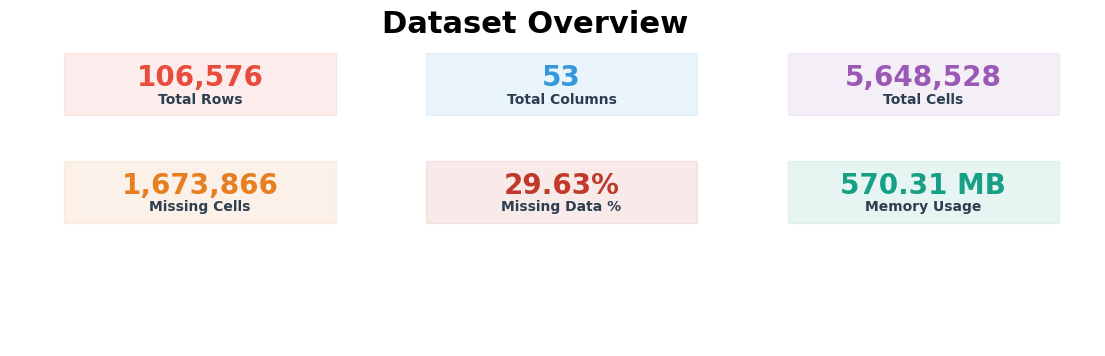

In [ ]:
# 1. Overview
# Basic stats
rows = len(track_data)
cols = len(track_data.columns)
total_cells = rows * cols
missing = track_data.isnull().sum().sum()
missing_pct = (missing / total_cells) * 100
memory_mb = track_data.memory_usage(deep=True).sum() / (1024**2)

# Column types
text_cols = track_data.select_dtypes(include='object').columns
num_cols = track_data.select_dtypes(include=np.number).columns

# Metrics to show
metrics = [
    ('Total Rows', f'{rows:,}', '#e74c3c'),
    ('Total Columns', str(cols), '#3498db'),
    ('Total Cells', f'{total_cells:,}', '#9b59b6'),
    ('Missing Cells', f'{missing:,}', '#e67e22'),
    ('Missing Data %', f'{missing_pct:.2f}%', '#c0392b'),
    ('Memory Usage', f'{memory_mb:.2f} MB', '#16a085')
]

# Create figure
plt.figure(figsize=(14, 4))
plt.suptitle('Dataset Overview', fontsize=22, fontweight='bold', y=0.95, color='black')

# Draw cards
for i, (title, val, color) in enumerate(metrics):
    x = (i % 3) / 3 + 0.05
    y = 0.75 - (i // 3) * 0.35
    plt.gca().add_patch(plt.Rectangle((x, y), 0.25, 0.2, color=color, alpha=0.1))
    plt.text(x + 0.125, y + 0.12, val, ha='center', va='center', fontsize=20, fontweight='bold', color=color)
    plt.text(x + 0.125, y + 0.05, title, ha='center', va='center', fontsize=10, fontweight='bold', color='#2c3e50')

plt.axis('off')
plt.show()


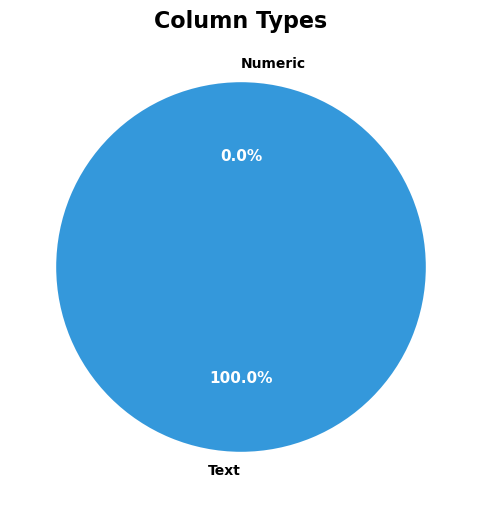

In [ ]:
# 2. Count column types
type_counts = {'Text': len(text_cols), 'Numeric': len(num_cols)}
colors = ['#3498db', '#2ecc71']

# Create figure
plt.figure(figsize=(8, 6))
plt.title('Column Types', fontsize=16, fontweight='bold')

# Draw pie chart
wedges, texts, autotexts = plt.pie(
    type_counts.values(),
    labels=type_counts.keys(),
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)

# Style percentage labels
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(11)

# Show chart
plt.show()


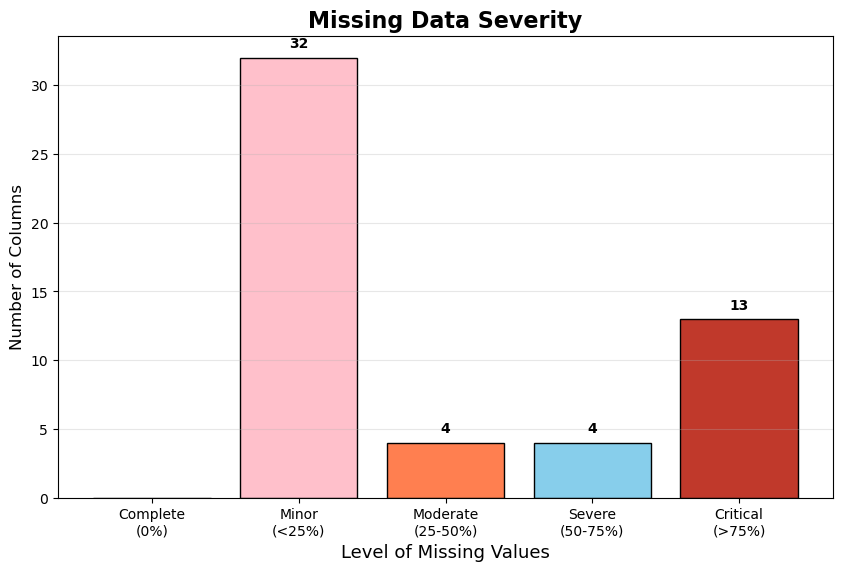

In [14]:
# 3. Count missing values per column
missing = track_data.isnull().sum()
levels = {
    'Complete\n(0%)': (missing == 0).sum(),
    'Minor\n(<25%)': (missing <= rows * 0.25).sum() - (missing == 0).sum(),
    'Moderate\n(25-50%)': ((missing > rows * 0.25) & (missing <= rows * 0.5)).sum(),
    'Severe\n(50-75%)': ((missing > rows * 0.5) & (missing <= rows * 0.75)).sum(),
    'Critical\n(>75%)': (missing > rows * 0.75).sum()
}

# Plot
plt.figure(figsize=(10, 6))
colors = ['#e74c3c', 'pink', 'coral', 'skyblue', '#c0392b']
bars = plt.bar(levels.keys(), levels.values(), color=colors, edgecolor='black')
plt.title('Missing Data Severity', fontsize=16, fontweight='bold')
plt.ylabel('Number of Columns', fontsize=12)
plt.xlabel('Level of Missing Values', fontsize=13)

# Add labels
for bar in bars:
    val = int(bar.get_height())
    if val > 0:
        plt.text(bar.get_x() + bar.get_width()/2, val + 0.5, str(val),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.show()
